In [1]:
%matplotlib inline

import numpy as np
import numba

import matplotlib.pylab as plt
import matplotlib.cm as cm
from IPython.display import HTML

from velocities import midbody_velocity, relative_velocities, animate_velocity
from velocities import _h_segment_position, _h_get_velocity

data = np.load('worm_example.npz')
skeletons = data['skeleton']
dorsal_contours = data['dorsal_contour']
ventral_contours = data['ventral_contour']

delta_frames = 12
fps = 25

signed_speed, angular_velocity, centered_skeleton = midbody_velocity(skeletons, delta_frames, fps)
r_radial_velocities, r_angular_velocities = relative_velocities(centered_skeleton, delta_frames, fps)


In [2]:
if False:
    #show that the centered skeletons are indeed centered to the midbody
    coords_c, orientation_v_c = _h_segment_position(centered_skeleton, partition = 'midbody')
    orientation_c = np.arctan2(orientation_v_c[:, 0], orientation_v_c[:, 1])

    xlim = (3500, 4500)
    figsize = (15, 2)
    plt.figure(figsize = figsize)
    plt.plot(coords_c)

    plt.figure(figsize = figsize)
    plt.plot(orientation_v_c, '.')

    plt.figure(figsize = figsize)
    plt.plot(orientation_c, '.')

    print(np.nanmax(np.abs(coords_c)))
    print(np.nanmax(np.abs(orientation_c)))

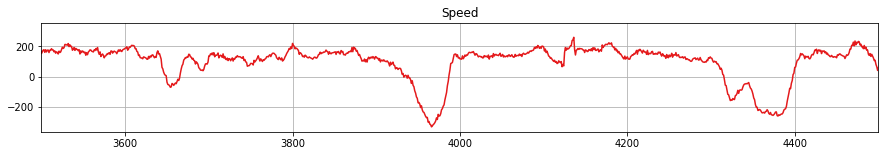

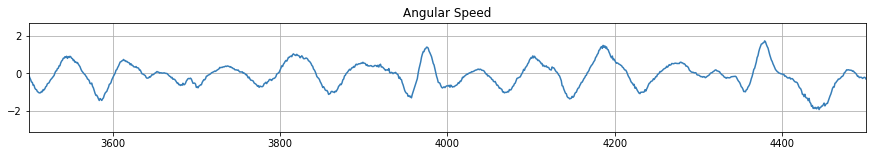

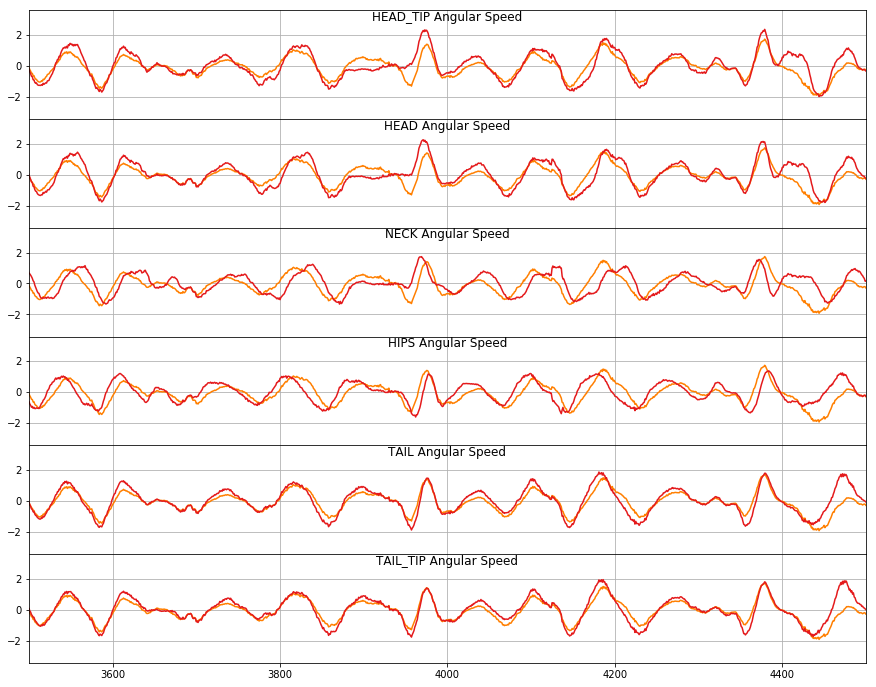

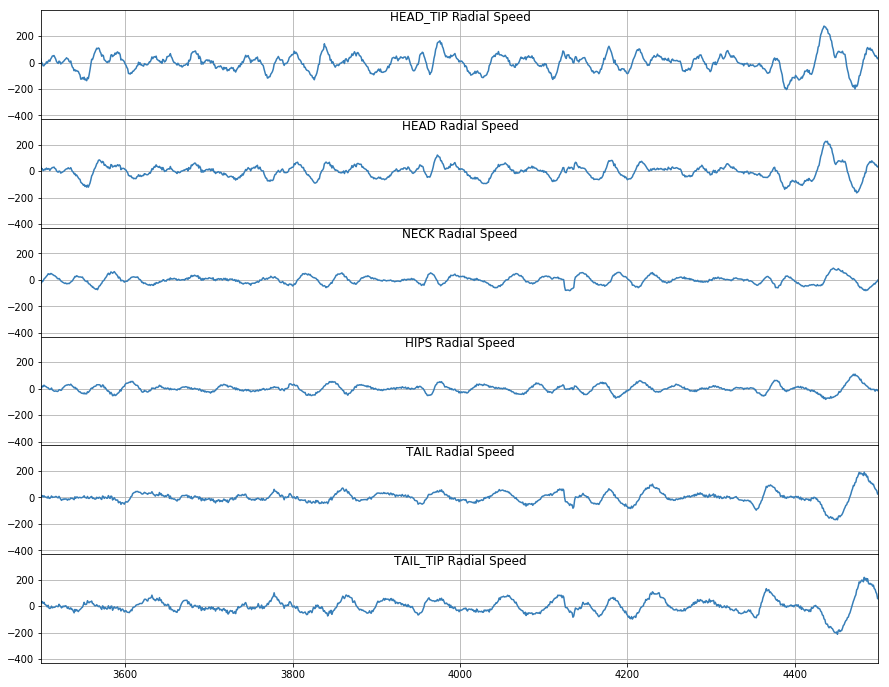

In [3]:
xlim = (3500, 4500)
figsize = (15, 2)

plt.figure(figsize = figsize)
plt.plot(signed_speed, color=cm.Set1.colors[0])
plt.title('Speed')
plt.xlim(xlim)
plt.grid('on')

plt.figure(figsize = figsize)
plt.plot(angular_velocity, color=cm.Set1.colors[1])
plt.xlim(xlim)
plt.title('Angular Speed')
plt.grid('on')

dat2plot = [
    (r_angular_velocities, 'Angular Speed'), 
    (r_radial_velocities, 'Radial Speed')
]
for ii, (dat, tt) in enumerate(dat2plot):
    f, axs = plt.subplots(len(dat), sharex=True, sharey=True, figsize = (15, 12))
    for ax, p in zip(axs, dat):
        if ii == 0:
            ax.plot(angular_velocity, color=cm.Set1.colors[4])
            
        ax.plot(dat[p], color=cm.Set1.colors[ii])
        ax.set_title(p.upper() + ' ' + tt, y=0.85)
        ax.grid('on')
    plt.xlim(xlim) 
    f.subplots_adjust(hspace=0)


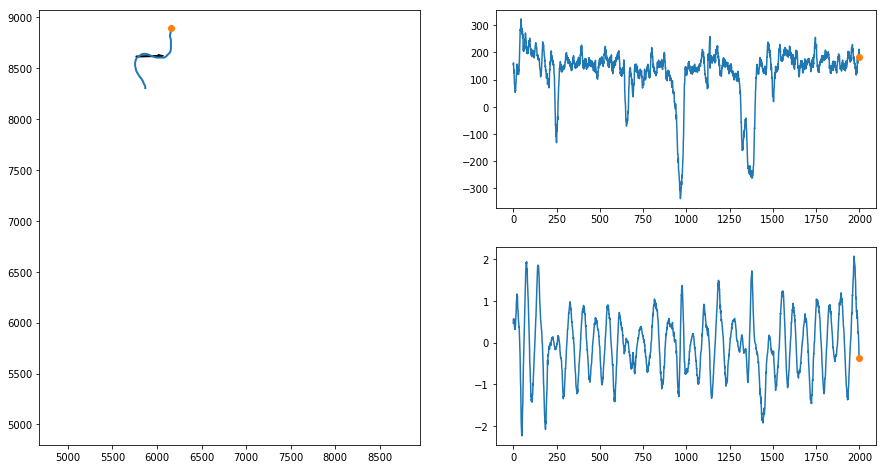

In [4]:
ini_t = 3000
fin_t = 5000

coords, orientation_v = _h_segment_position(skeletons, partition = 'midbody')


skel_a = skeletons[ini_t:fin_t]
arrow_size = orientation_v[ini_t:fin_t]
ini_arrow = coords[ini_t:fin_t] - arrow_size/2

ang_v = angular_velocity[ini_t:fin_t]
speed_v = signed_speed[ini_t:fin_t]


anim = animate_velocity(skel_a, ini_arrow, arrow_size, speed_v, ang_v)
HTML(anim.to_html5_video())

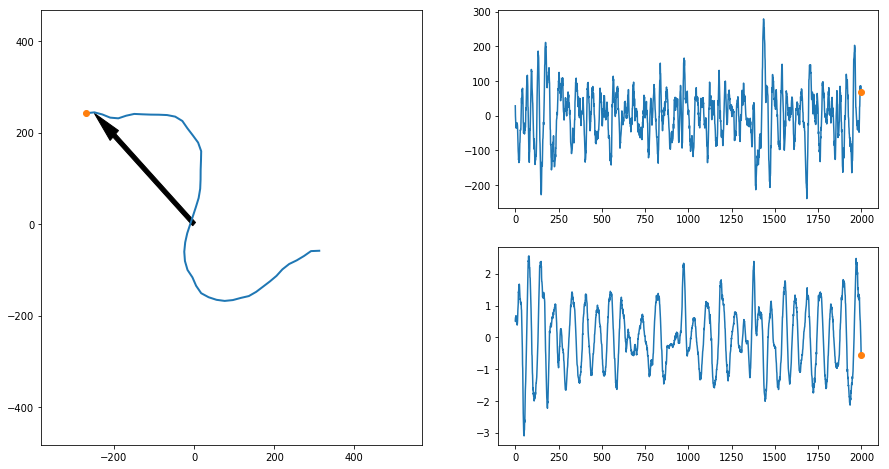

In [5]:
ini_t = 3000
fin_t = 5000

partition = 'head_tip'

segment_coords, _ = _h_segment_position(centered_skeleton, partition = partition)


skel_a = centered_skeleton[ini_t:fin_t]
arrow_size = segment_coords[ini_t:fin_t]
ini_arrow = np.zeros_like(arrow_size)

ang_v = r_angular_velocities[partition][ini_t:fin_t]
speed_v = r_radial_velocities[partition][ini_t:fin_t]

anim = animate_velocity(skel_a, ini_arrow, arrow_size, speed_v, ang_v)
HTML(anim.to_html5_video())


/Users/ajaver/Documents/GitHub/work-in-progress/work_in_progress/new_features/read_worm.py:155: RuntimeWarning: invalid value encountered in greater
  ang[ang > np.pi] -= 2 * np.pi
/Users/ajaver/Documents/GitHub/work-in-progress/work_in_progress/new_features/read_worm.py:156: RuntimeWarning: invalid value encountered in less
  ang[ang < -np.pi] += 2 * np.pi


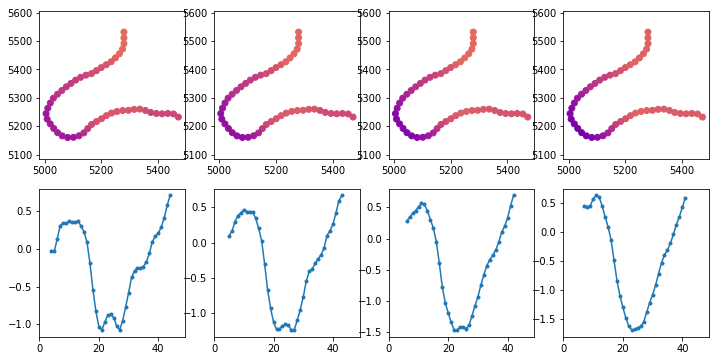

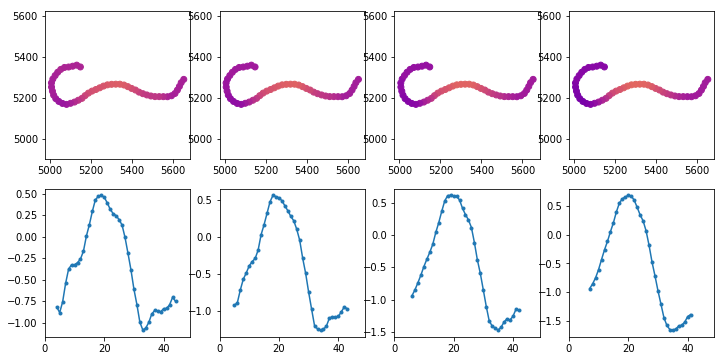

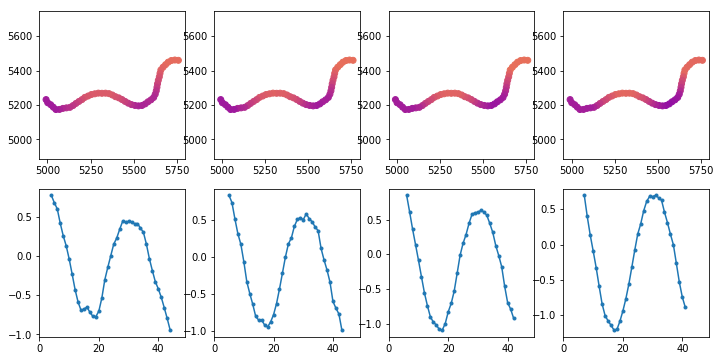

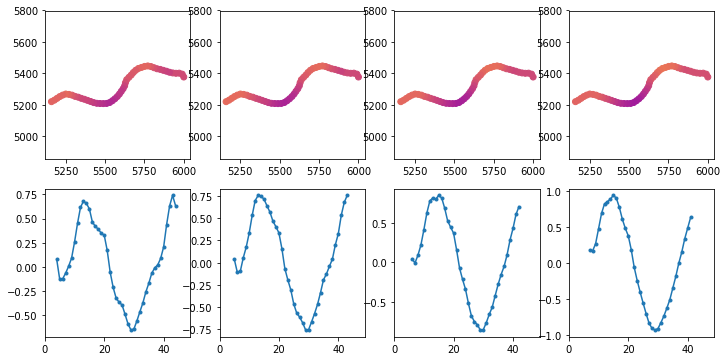

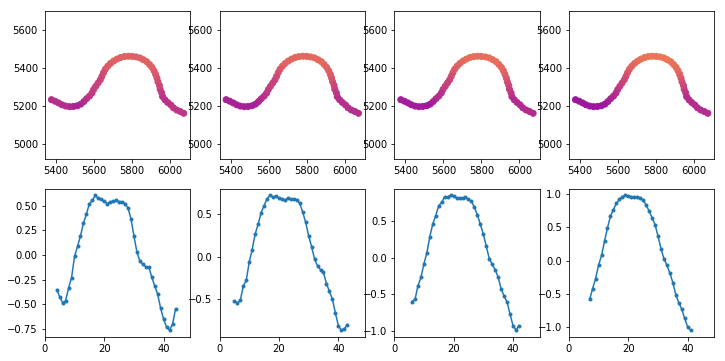

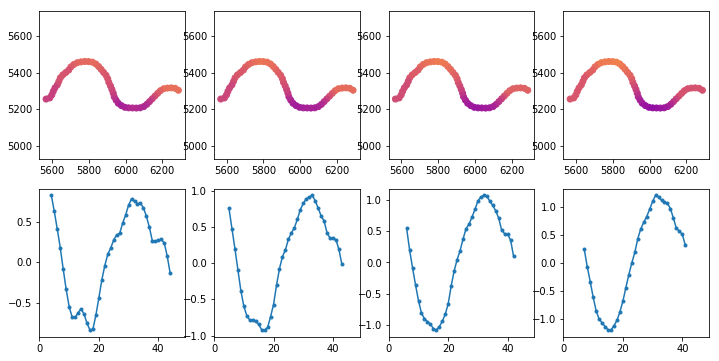

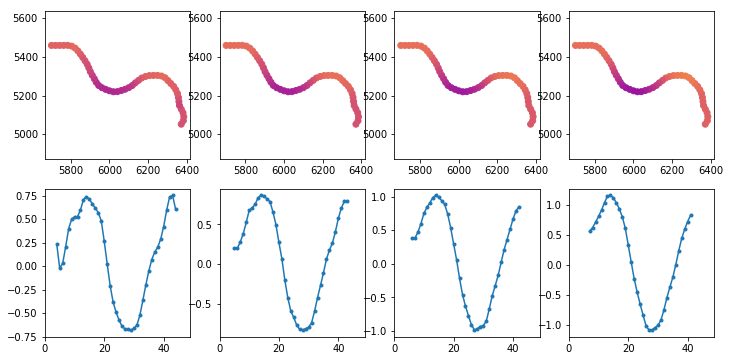

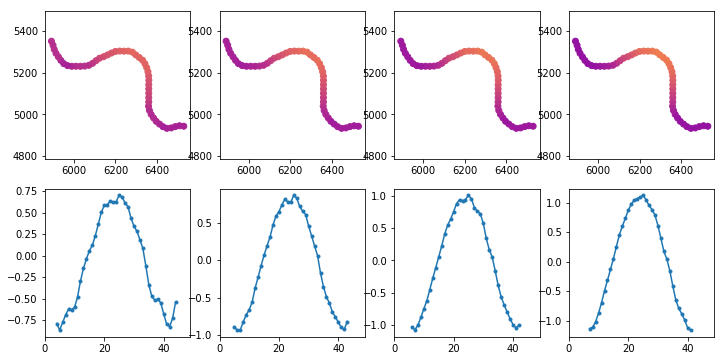

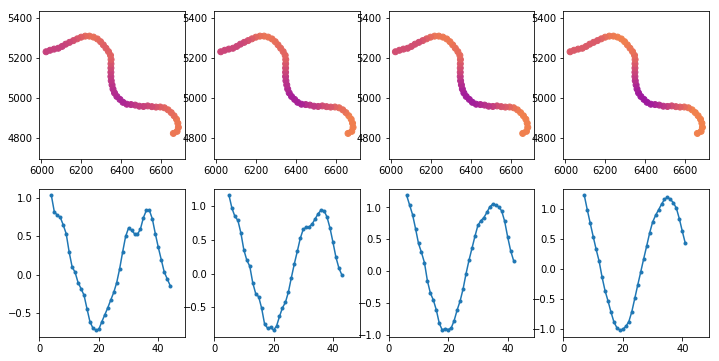

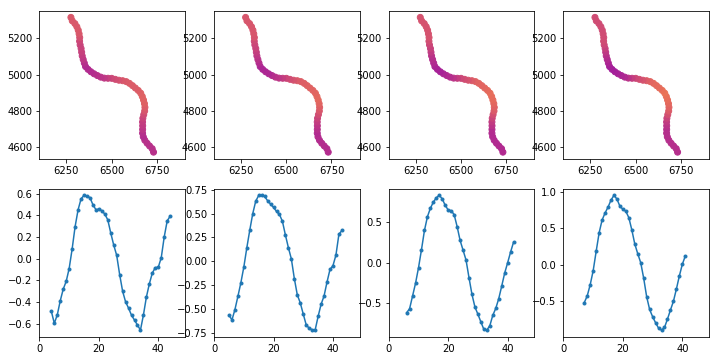

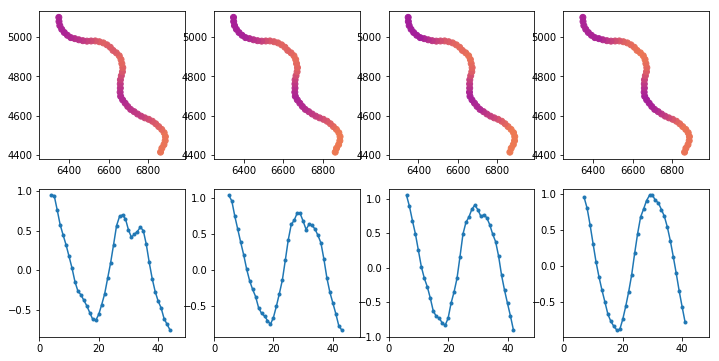

In [23]:


angles = [(segment_size, ) for segment_size in  range(4,8)]

tot = len(angles)
n_cols = tot
n_rows = 2#int(np.ceil(tot/n_cols))
segment_size, ang = angles[2]

n_range = 301
start_p = 7000
delta_f = 30
for ii in range(start_p, start_p+n_range, delta_f):
    plt.figure(figsize=(3*n_cols,3*n_rows))

    for iseg, (segment_size, ang) in enumerate(angles):
        plt.subplot(2, n_cols, iseg+1)
        x = skeletons[ii,:,0]
        y = skeletons[ii,:,1]
        c = (ang[ii]+np.pi)/(2*np.pi)
        c = np.pad(c, (segment_size,segment_size), 'edge')
        c = cm.plasma(c)
        plt.scatter(x, y, c=c)
        plt.axis('equal')


        plt.subplot(2,n_cols, iseg+1+n_cols)
        dd = np.arange(ang[ii].size) + segment_size
        plt.plot(dd, ang[ii], '.-')

        plt.xlim(0, x.size)